In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from math import cos, sqrt

In [2]:
def z(x, y, c): # get z w.r.t. x and y
    pts = []
    # Equation of a sphere is --> z = sqrt( r*r - x*x - y*y )
    for _y in y: # every y
        for _x in x: # every x
            yc = _y-c # subtract center coordinate y
            xc = _x-c # subtract center coordinate x
            z_sq = r*r - xc*xc - yc*yc # using equation of a sphere
            if z_sq > 0: # if the value is negative, don't use
                pts.append([_x, _y, sqrt(z_sq)]) # save pts ( x,y,z )

    return np.array(pts)

In [3]:
def normals(pts, c): # get normal vectors
    n = []

    for x, y, z in pts:
        tmp_n = [(x-c)/z, (y-c)/z, 1] # partial derivate of z
        norm = sqrt(tmp_n[0]*tmp_n[0] + tmp_n[1]*tmp_n[1] + 1) # get vector length to normalize
        n.append([tmp_n[0]/norm, tmp_n[1]/norm, 1/norm]) # devide norm to normalize
    return np.array(n)

In [4]:
def dot_product(I, normals, pts):
    img = np.zeros((row, col)) # init image zero
    for idx, (nx, ny, nz) in enumerate(normals):
        dot = nx * I[0] + ny * I[1] + nz * I[2] # dot-product of light direction with normal vectors of sphere's surface
        img[(int)(pts[idx, 1]), (int)(pts[idx, 0])] = dot # put the result into image for every points
    return img

In [5]:
r = 50 # radius
I = (0.2, 0, 0.98) #intensity

col = 120 # image width
row = 120 # image height
c = col/2 # image center
img = np.zeros((row, col)) # init image zero

x = np.linspace(0, col, col, endpoint=False) # set x coordinate
y = np.linspace(0, row, row, endpoint=False) # set y coordinate
pts = z(x, y, c) # get z coordiante w.r.t. x and y
normals = normals(pts, c) # get normal vectors
img = dot_product(I, normals, pts) # dot product normal and I vector

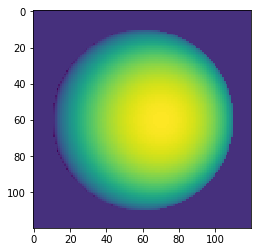

In [6]:
plt.imshow(img) # show image. Using cmap='gray', you can see gray an image. 
#plt.image(img, cmap='gray')
plt.show()

In [7]:
#####################
# bonus #
#####################

# to draw animation in jupyter notebook

%matplotlib notebook 
import matplotlib.animation as anim

In [8]:
Ix = np.linspace(-1, 1, 50)
Iy = np.linspace(-1, 1, 50)
Iz = np.linspace(1, -1, 50)
Ix = np.expand_dims(Ix, axis=1)
Iy = np.expand_dims(Iy, axis=1)
Iz = np.expand_dims(Iz, axis=1)

I = np.hstack((Ix, Iy,Iz)) # stack intensity

In [9]:
imgs = []
for idx in range(I.shape[0]):
    image = dot_product(I[idx,:], normals, pts)
    imgs.append(image) # stack image

<IPython.core.display.Javascript object>


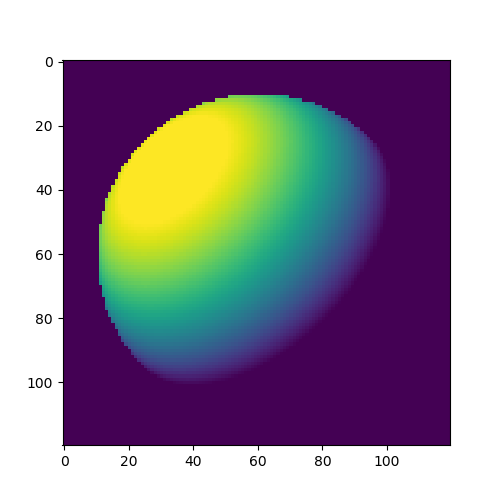

In [10]:
# draw animation
fig = plt.figure(figsize=(5,5)) # fix figure size
im = plt.imshow(imgs[0], interpolation='none', aspect='auto', vmin=0, vmax=1)

def animate_func(i):
   im.set_array(imgs[i])
   return [im]

ani = anim.FuncAnimation(fig, animate_func, frames = 50, interval = 50) 